# Matching SDG dataset with SciNet dataset starts from here

In [2]:
import time

In [3]:
import pandas as pd
import numpy as np

In [130]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

#### Past database without SDG_codes separation and field of study

#### New database *with* SDG code separation and field of study

In [341]:
field_data = pd.read_csv("SciSciNet_2023/SciSciNet_Fields.tsv", sep= '\t')

In [343]:
top_field = field_data[field_data['Field_Type'] == 'Top']

In [353]:
%%time
import sqlite3
con = sqlite3.connect("final.sqlite")
cur = con.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('final_matched_with_fields',)]
CPU times: user 3.35 ms, sys: 76 µs, total: 3.42 ms
Wall time: 1.68 ms


In [354]:
cur.execute("PRAGMA table_info('final_matched_with_fields')").fetchall()

[(0, 'index', 'INT', 0, None, 0),
 (1, 'PaperID', 'INT', 0, None, 0),
 (2, 'DOI', 'TEXT', 0, None, 0),
 (3, 'DocType', 'TEXT', 0, None, 0),
 (4, 'Year', 'REAL', 0, None, 0),
 (5, 'Date', 'TEXT', 0, None, 0),
 (6, 'JournalID', 'REAL', 0, None, 0),
 (7, 'ConferenceSeriesID', 'REAL', 0, None, 0),
 (8, 'Citation_Count', 'REAL', 0, None, 0),
 (9, 'C10', 'REAL', 0, None, 0),
 (10, 'Reference_Count', 'REAL', 0, None, 0),
 (11, 'C5', 'REAL', 0, None, 0),
 (12, 'Team_Size', 'REAL', 0, None, 0),
 (13, 'Institution_Count', 'REAL', 0, None, 0),
 (14, 'Disruption', 'REAL', 0, None, 0),
 (15, 'Atyp_10pct_Z', 'REAL', 0, None, 0),
 (16, 'Atyp_Pairs', 'REAL', 0, None, 0),
 (17, 'Atyp_Median_Z', 'REAL', 0, None, 0),
 (18, 'SB_B', 'REAL', 0, None, 0),
 (19, 'SB_T', 'REAL', 0, None, 0),
 (20, 'Patent_Count', 'INT', 0, None, 0),
 (21, 'Newsfeed_Count', 'INT', 0, None, 0),
 (22, 'Tweet_Count', 'INT', 0, None, 0),
 (23, 'NCT_Count', 'INT', 0, None, 0),
 (24, 'NIH_Count', 'INT', 0, None, 0),
 (25, 'NSF_Count'

In [355]:
%%time
df_matched = pd.read_sql("select * from final_matched_with_fields", con)

CPU times: user 29min 9s, sys: 5min 14s, total: 34min 23s
Wall time: 34min 28s


In [356]:
sum(df_matched.sdg_codes.isnull())

94432041

In [359]:
94432041 / len(df_matched)

0.9493790433192606

In [362]:
len(df_matched.PaperID.unique())

99445103

In [369]:
df_matched[df_matched.PaperID==2025371160]

,index,PaperID,DOI,DocType,Year,Date,JournalID,ConferenceSeriesID,Citation_Count,C10,Reference_Count,C5,Team_Size,Institution_Count,Disruption,Atyp_10pct_Z,Atyp_Pairs,Atyp_Median_Z,SB_B,SB_T,Patent_Count,Newsfeed_Count,Tweet_Count,NCT_Count,NIH_Count,NSF_Count,WSB_mu,WSB_sigma,WSB_Cinf,fem,country,sdg_codes,fem_ratio,sdg_1,sdg_2,sdg_3,sdg_4,sdg_5,sdg_6,sdg_7,sdg_8,sdg_9,sdg_10,sdg_11,sdg_12,sdg_13,sdg_14,sdg_15,sdg_16,sdg_17,FieldID,Field_Name
99447144,99425087,2025371160,10.1007/s10956-012-9392-x,Journal,2013.0,2013-06-01,158654976.0,NaN,3.0,NaN,26.0,2.0,3.0,1.0,0.001736,0.3201,33.0,196.116309,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,0,"GB,GB,GB",None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39432304.0,Environmental science
99447145,99425087,2025371160,10.1007/s10956-012-9392-x,Journal,2013.0,2013-06-01,158654976.0,NaN,3.0,NaN,26.0,2.0,3.0,1.0,0.001736,0.3201,33.0,196.116309,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,0,"GB,GB,GB",None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127413603.0,Engineering


In [370]:
duplicates = df_matched[df_matched.PaperID.duplicated()]

In [373]:
Counter(duplicates.sdg_codes)

Counter({None: 19525,
         '4': 1869,
         '10': 33,
         '16': 141,
         '2': 20,
         '7': 188,
         '3': 77,
         '4,4': 1,
         '11': 26,
         '6': 6,
         '13,14': 3,
         '14': 21,
         '13': 50,
         '12': 5,
         '3,8': 1,
         '3,7': 1,
         '8': 32,
         '4,7': 5,
         '11,16': 1,
         '7,13': 19,
         '1': 4,
         '2,14': 1,
         '2,16': 1,
         '9': 3,
         '6,10': 1,
         '4,5': 3,
         '5,10': 1,
         '5': 2,
         '2,9': 1,
         '15': 6,
         '10,16': 2,
         '2,13': 2,
         '12,13': 1,
         '4,15': 1,
         '17': 3,
         '11,12': 1,
         '7,16': 1,
         '3,11': 1,
         '2,12': 1,
         '13,16': 1})

In [148]:
94412516 / len(df_matched)

0.9493933150232646

In [375]:
df_final = df_matched.drop(['index', 'Date', 'DOI','JournalID', 'Disruption','ConferenceSeriesID', 'Reference_Count',  
                              'Atyp_10pct_Z',  'Atyp_Pairs', 'Atyp_Median_Z', 'SB_B', 'SB_T', 
                              'WSB_mu', 'WSB_sigma', 'WSB_Cinf'], axis=1)

In [376]:
df_sdg = df_final[~df_final.sdg_codes.isnull()]

#### Basic data analysis plot (Absolute number)

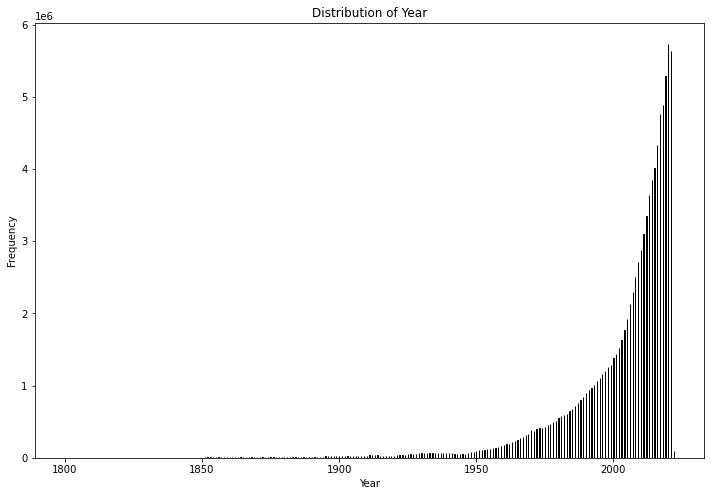

In [377]:
plt.figure(figsize=(12,8))
# Plot of the yearly publishing trend (regardless of whether having any SDG codes)
plt.hist(df_final['Year'], bins='auto', edgecolor='black')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')

# Display the histogram
plt.show()

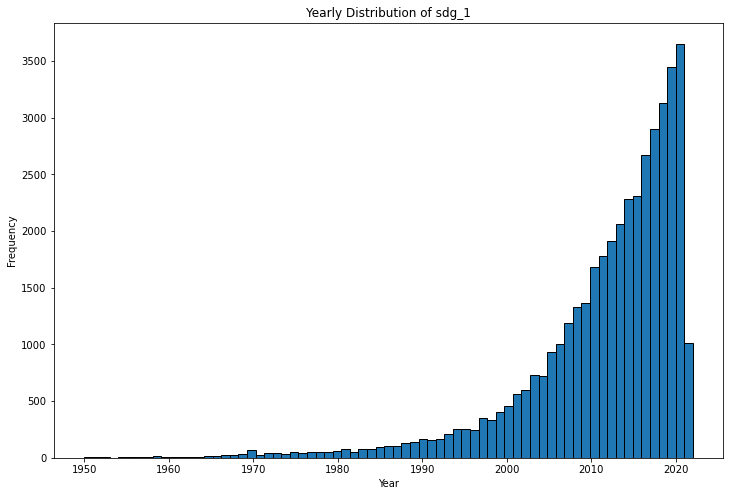

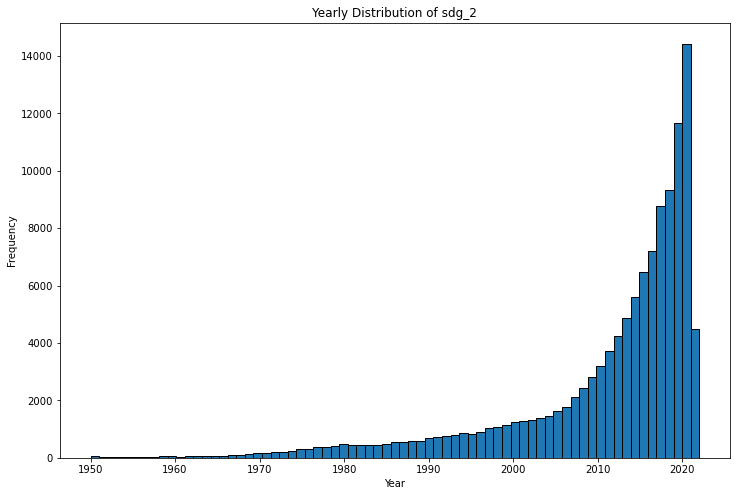

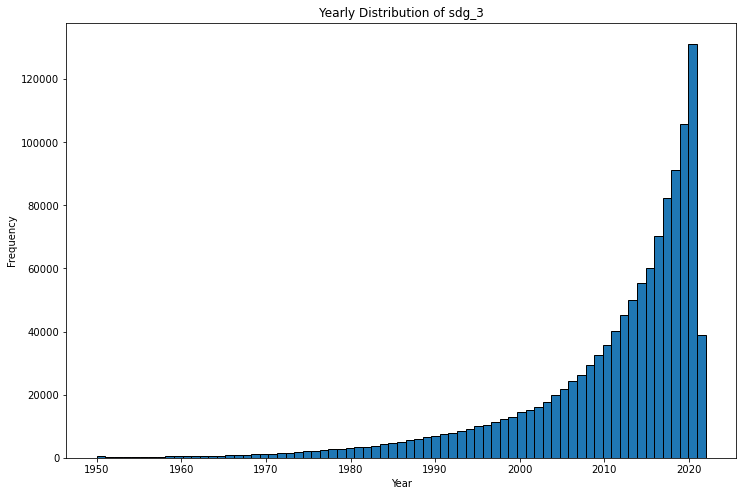

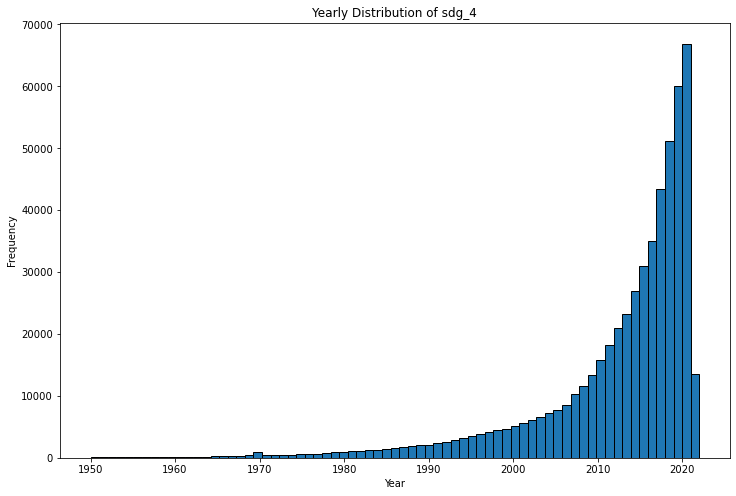

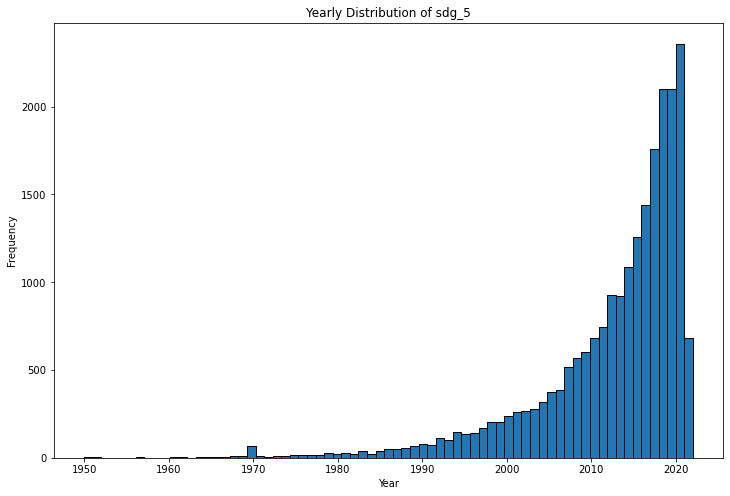

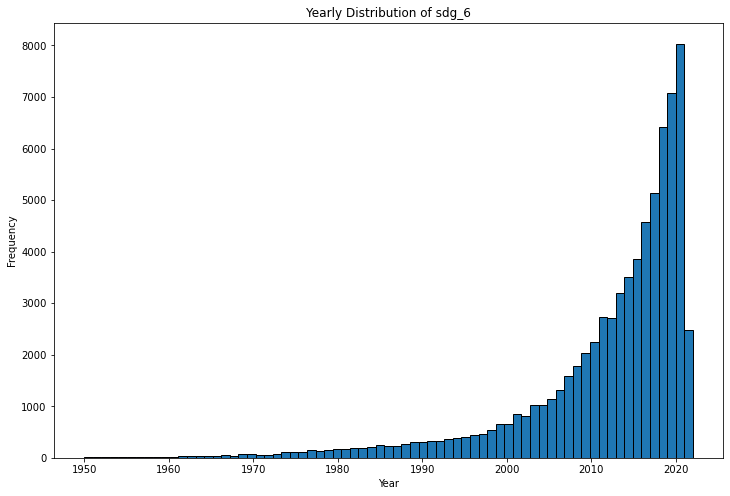

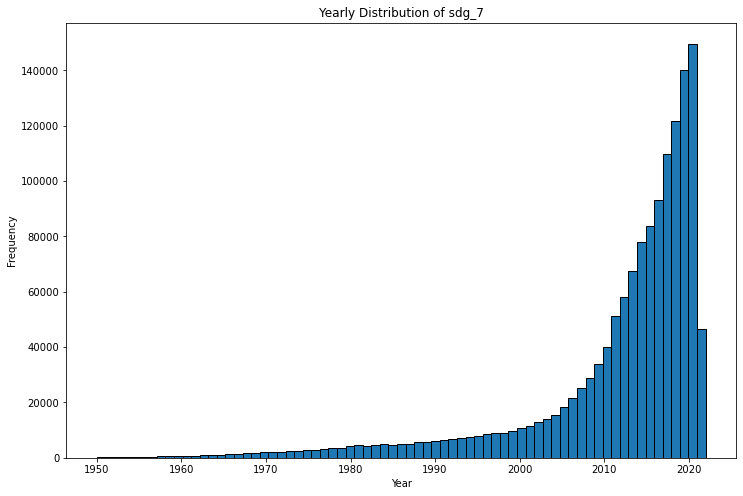

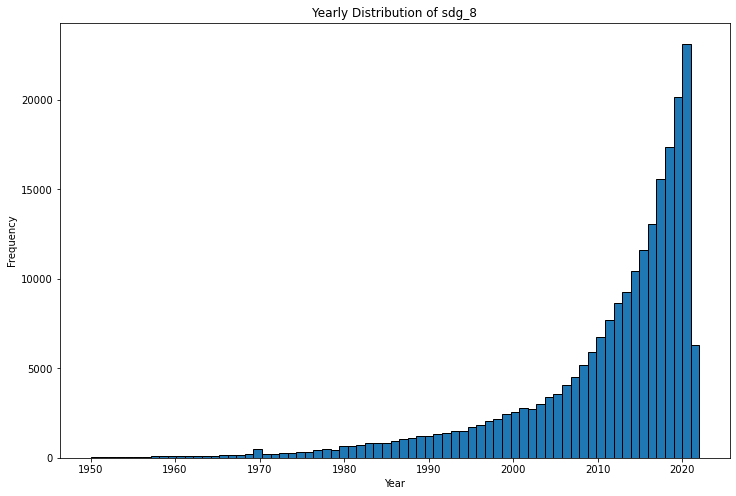

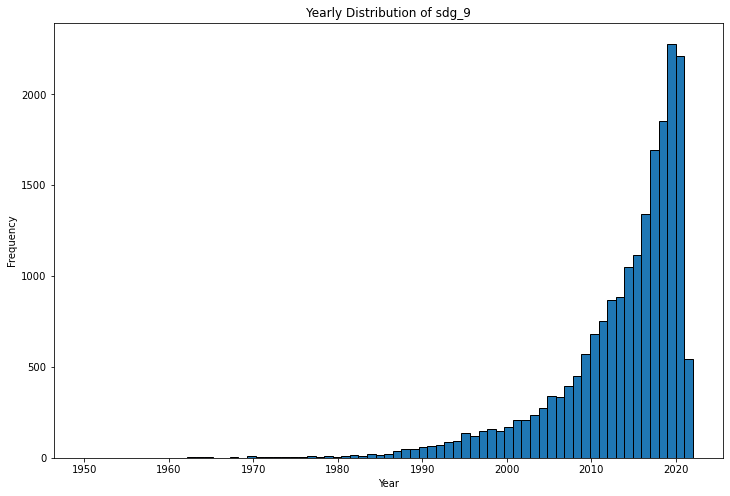

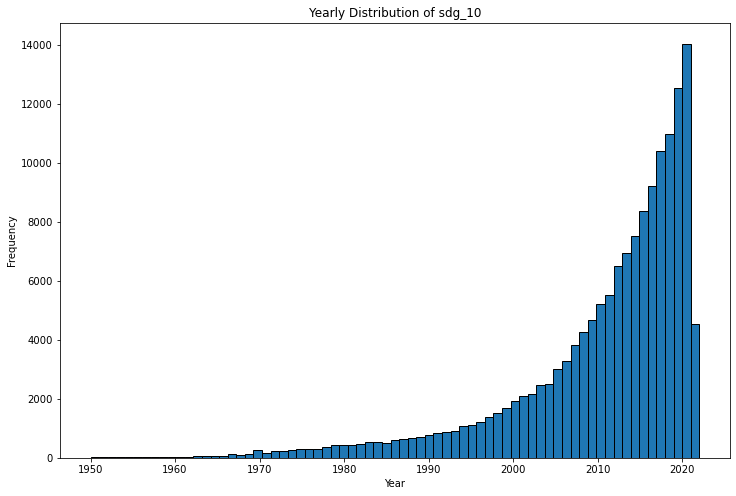

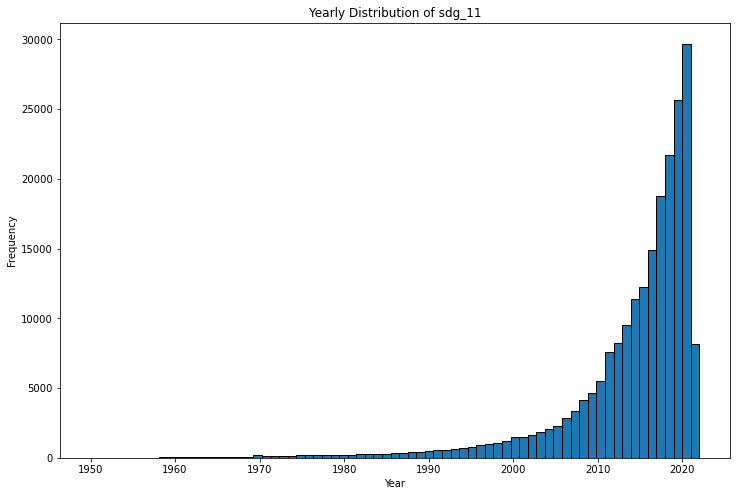

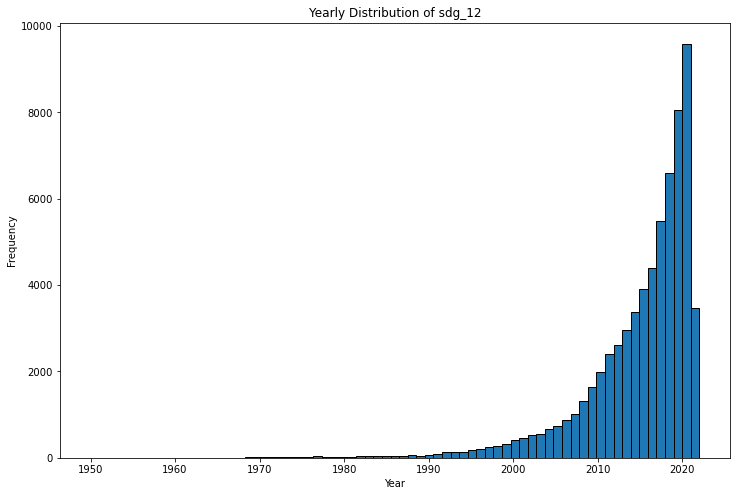

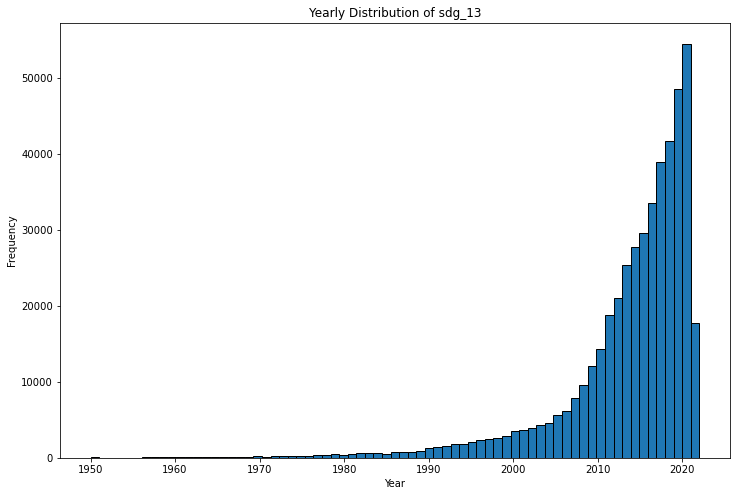

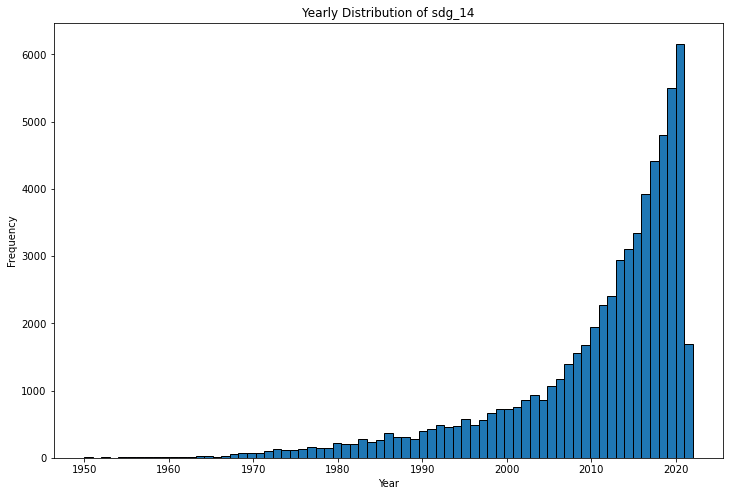

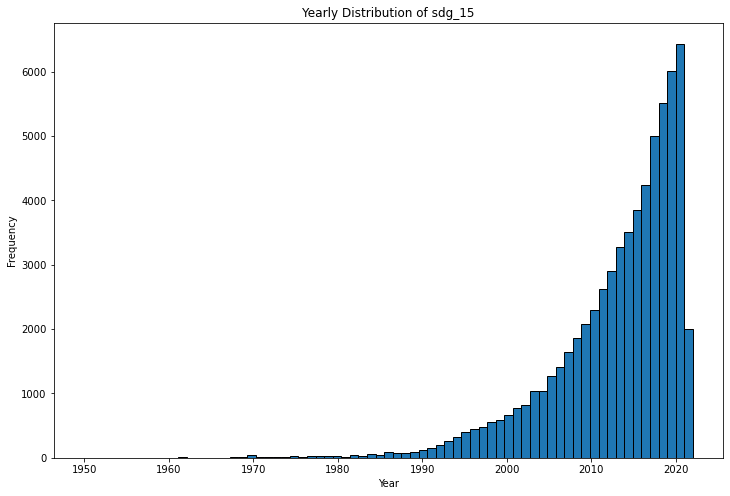

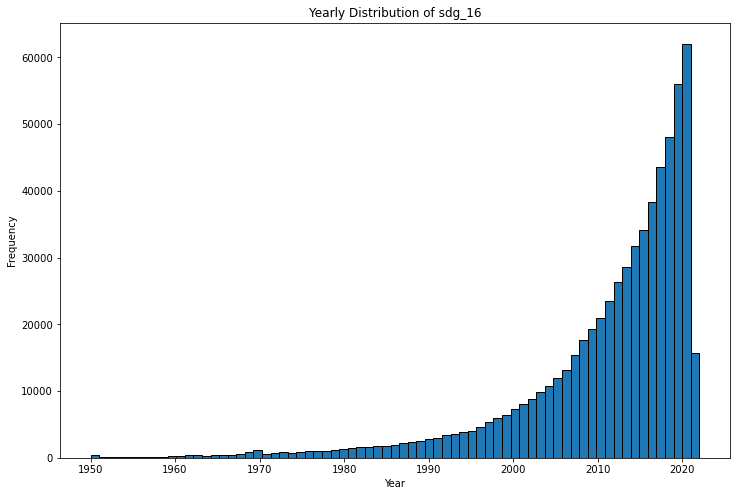

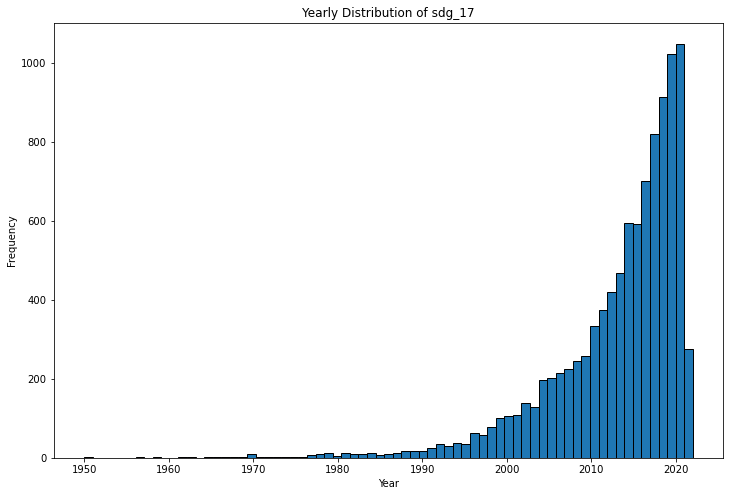

In [304]:
for column in df_sdg.columns[-17:]:  # Assuming 'sdg_1' to 'sdg_17' are columns 1 to 17
    plt.figure(figsize=(12, 8))
    
    data = df_sdg[df_sdg['Year'] >= 1950][['Year', column]].groupby('Year').sum()
    
    # Create the yearly distribution plot
    plt.hist(data.index,  bins = 71, weights=data.values.flatten(), edgecolor='black')
    
    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f'Yearly Distribution of {column}')
    
    # Display the plot
    plt.show()


#### Get the weight of each rows (inverse of publication for the matching FieldID for a given year)

In [347]:
top_field

,FieldID,Field_Name,Field_Type
8,95457728,History,Top
11,127313418,Geology,Top
29,162324750,Economics,Top
53,205649164,Geography,Top
76,185592680,Chemistry,Top
83,138885662,Philosophy,Top
86,144024400,Sociology,Top
87,192562407,Materials science,Top
96,33923547,Mathematics,Top
107,86803240,Biology,Top


In [382]:
for FieldID, Field_Name in zip(top_field.FieldID, top_field.Field_Name):
    print(FieldID)

95457728
127313418
162324750
205649164
185592680
138885662
144024400
192562407
33923547
86803240
41008148
17744445
127413603
15744967
39432304
144133560
121332964
71924100
142362112


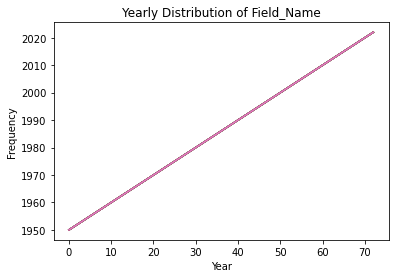


KeyboardInterrupt



Error in callback <function flush_figures at 0x2ae1f38ac280> (for post_execute):


In [ ]:
for FieldID, Field_Name in zip(top_field.FieldID, top_field.Field_Name):
    for column in df_final.columns[-17:]:
        data = df_final[(df_final['Year'] >= 1950) & (df_final['FieldID'] == FieldID)][['Year', column]].groupby('Year').sum()

        # Create the yearly distribution plot
        plt.plot(data.index)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title(f'Yearly Distribution of {column}')

    # Display the plot
    plt.show()


In [347]:
# Calculate the sum of rows with the same 'FieldID' and 'Year'
grouped_sum = df_final.groupby(['FieldID', 'Year']).size().reset_index(name='sum_rows')

# Merge the sum with the original DataFrame
df_final = pd.merge(df_final, grouped_sum, on=['FieldID', 'Year'], how='left')

# Calculate the inverse of the sum and assign it to the 'weight' column
df_final['weight'] = 1 / df_final['sum_rows']

# Print the updated DataFrame
print(df_final)


,FieldID,Field_Name,Field_Type
8,95457728,History,Top
11,127313418,Geology,Top
29,162324750,Economics,Top
53,205649164,Geography,Top
76,185592680,Chemistry,Top
83,138885662,Philosophy,Top
86,144024400,Sociology,Top
87,192562407,Materials science,Top
96,33923547,Mathematics,Top
107,86803240,Biology,Top


In [306]:
df_cor = df_cor.iloc[:, -17:]

In [307]:
correlation_matrix = df_cor.corr(method = 'kendall', numeric_only = 'float')

In [308]:
print(correlation_matrix)

           sdg_1     sdg_2     sdg_3     sdg_4     sdg_5     sdg_6     sdg_7  \
sdg_1   1.000000  0.010424 -0.045517 -0.028173  0.000145 -0.003035 -0.054224   
sdg_2   0.010424  1.000000 -0.076701 -0.053071 -0.009252 -0.007878 -0.094517   
sdg_3  -0.045517 -0.076701  1.000000 -0.191945 -0.035252 -0.059634 -0.346195   
sdg_4  -0.028173 -0.053071 -0.191945  1.000000 -0.005192 -0.041326 -0.216560   
sdg_5   0.000145 -0.009252 -0.035252 -0.005192  1.000000 -0.006751 -0.040880   
sdg_6  -0.003035 -0.007878 -0.059634 -0.041326 -0.006751  1.000000 -0.069093   
sdg_7  -0.054224 -0.094517 -0.346195 -0.216560 -0.040880 -0.069093  1.000000   
sdg_8   0.014056 -0.027823 -0.116139 -0.069288 -0.005981 -0.023151 -0.129213   
sdg_9  -0.002349 -0.009090 -0.033647 -0.020825 -0.004066 -0.005020 -0.035520   
sdg_10  0.091365 -0.022352 -0.089668 -0.051386  0.085229 -0.018419 -0.108471   
sdg_11 -0.012890 -0.029489 -0.107140 -0.071226 -0.013086 -0.017332 -0.113771   
sdg_12 -0.009002  0.013028 -0.063559 -0.

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

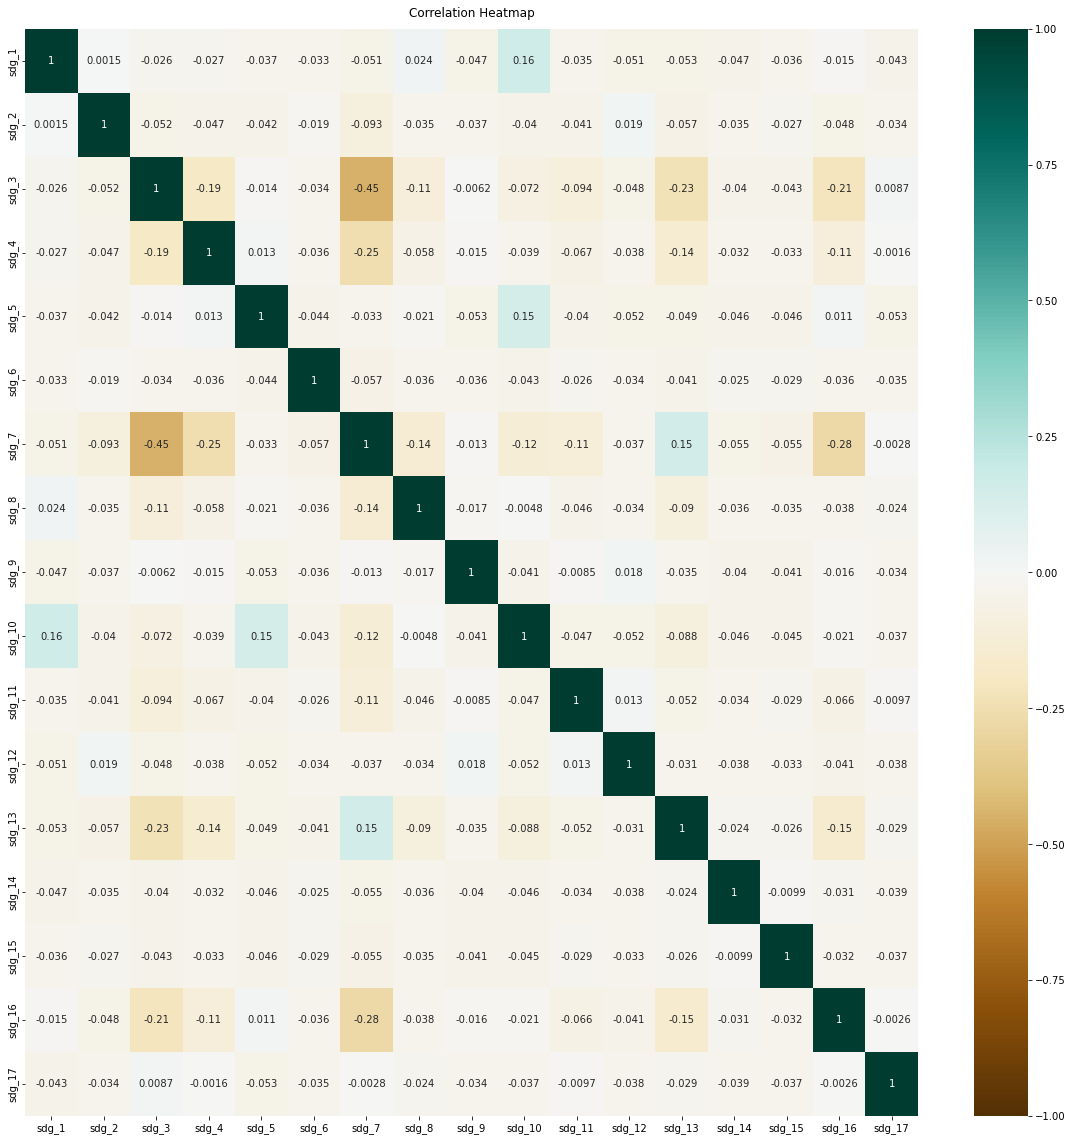

In [312]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(correlation_matrix.corr(), vmin=-1, vmax=1, annot=True, cmap = 'BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Making an animation of heatmap (Yearly trend)

In [315]:
df_cor_2 = df_final[~df_final.sdg_codes.isnull()]
df_cor_2 = df_cor_2[df_cor_2.Year > 1949]

In [318]:
from PIL import Image
import io

In [320]:
years = df_cor_2['Year'].unique()
years = np.sort(years)

In [331]:
images = []

for year in years:
    data = df_cor_2[df_cor_2['Year'] == year][['sdg_1', 'sdg_2', 'sdg_3', 'sdg_4', 'sdg_5', 'sdg_6', 'sdg_7', 'sdg_8', 'sdg_9', 'sdg_10', 'sdg_11', 'sdg_12', 'sdg_13', 'sdg_14', 'sdg_15', 'sdg_16', 'sdg_17']]
    
    corr_matrix = data.corr(method = 'kendall')
    
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt = ".1f", vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for Year {year}')
    
    # Convert the plot to an image
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()

images[0].save('heatmap_kendall.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

### Adding field of study column

In [86]:
%%time
import csv
import pandas as pd

df_MAG_F = pd.read_csv('MAG_2021-12-06/FieldsOfStudy.txt', sep='\t', header=None, 
                     quoting=csv.QUOTE_NONE)



# Column 5 here is the level of fields ranging from 0 to 5.
# Lv0 field can be considered as the main field.
# Lv1 field can be considered as the sub-field.

CPU times: user 1.63 s, sys: 163 ms, total: 1.79 s
Wall time: 1.83 s


,0,1,2,3,4,5,6,7,8,9
0,417682,16941,night air,Night air,NaN,2,104,103,428,2016-06-24
1,1443462,16012,immobiliser,Immobiliser,NaN,2,220,215,1028,2016-06-24
2,1576492,12988,matrix pencil,Matrix pencil,NaN,3,1855,1803,30181,2016-06-24
3,2657588,13563,combinatorial topology,Combinatorial topology,NaN,3,571,534,22755,2016-06-24
4,3079626,8615,quantum electrodynamics,Quantum electrodynamics,NaN,1,237527,229050,3186718,2016-06-24
...,...,...,...,...,...,...,...,...,...,...
714966,3020516982,15210,cholesterol diet,Cholesterol diet,NaN,3,559,557,4074,2020-05-01
714967,3020525681,16911,community connectedness,Community connectedness,NaN,3,116,116,718,2020-05-01
714968,3020532668,14800,pre cooling,Pre cooling,NaN,2,1082,1070,2749,2020-05-01
714969,3020562556,14742,image guided radiotherapy,Image guided radiotherapy,NaN,4,929,924,6650,2020-05-01


In [348]:
df_matched

,index,PaperID,DOI,DocType,Year,Date,JournalID,ConferenceSeriesID,Citation_Count,C10,Reference_Count,C5,Team_Size,Institution_Count,Disruption,Atyp_10pct_Z,Atyp_Pairs,Atyp_Median_Z,SB_B,SB_T,Patent_Count,Newsfeed_Count,Tweet_Count,NCT_Count,NIH_Count,NSF_Count,WSB_mu,WSB_sigma,WSB_Cinf,fem,country,sdg_codes,fem_ratio,sdg_1,sdg_2,sdg_3,sdg_4,sdg_5,sdg_6,sdg_7,sdg_8,sdg_9,sdg_10,sdg_11,sdg_12,sdg_13,sdg_14,sdg_15,sdg_16,sdg_17
0,0,14558443,10.1007/978-3-662-45174-8_28,Conference,2014.0,2014-10-12,NaN,1.131603e+09,14.0,NaN,11.0,9.0,3.0,1.0,-0.004613,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,2,NaN,NaN,NaN,1,"US,US,US",None,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,15354235,10.1007/978-3-662-44777-2_60,Conference,2014.0,2014-09-08,NaN,1.154039e+09,9.0,NaN,18.0,8.0,3.0,2.0,-0.002883,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,"FI,CL,CL",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,16763247,10.22004/ag.econ.174942,Repository,2014.0,2014-01-01,3.121261e+09,NaN,0.0,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,1,None,None,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,24327294,10.1007/978-3-319-03973-2_13,Conference,2013.0,2013-01-01,NaN,1.196984e+09,20.0,NaN,25.0,17.0,2.0,1.0,-0.001490,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,1,"GB,GB",None,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,35428871,10.1023/a:1022270923160,Journal,1998.0,1998-01-01,2.016092e+08,NaN,6.0,2.0,16.0,0.0,2.0,1.0,0.001411,-18.433685,28.0,-0.401707,4.0,8.0,0,0,0,0,0,0,NaN,NaN,NaN,0,"US,US",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99445098,99445098,3215499129,10.1109/icrera52334.2021.9598593,None,2021.0,2021-09-26,NaN,NaN,0.0,NaN,14.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,"TR,IQ,IQ,IQ",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99445099,99445099,3215845741,10.3389/fcvm.2021.766676,Journal,2021.0,2021-11-24,2.595414e+09,NaN,0.0,NaN,33.0,NaN,8.0,3.0,NaN,-9.281575,259.0,7.654166,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,1,"CA,BR,BR",None,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99445100,99445100,3216186450,10.1016/j.idnow.2021.11.004,None,2021.0,2021-11-24,NaN,NaN,0.0,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,None,None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99445101,99445101,3216762448,10.1016/j.istruc.2021.10.095,Journal,2022.0,2022-01-01,2.898443e+09,NaN,0.0,NaN,33.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,"JP,JP",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
def find_subject(inp):
    idx = df_MAG_F.loc[df_MAG_F[3] == inp, :][0]
    indexes = SciNet_Paper_LV0Field.loc[SciNet_Paper_LV0Field['1'] == 121332964, :].index
    return indexes

In [14]:
%%time
# Select physics papers from SciNet_Paper_LV0Field table.
# Please note that all data index in SciNet are string format as '1' below.
Physics_Paper = SciNet_Paper_LV0Field.loc[SciNet_Paper_LV0Field['1'] == 121332964, :]
Physics_Paper

CPU times: user 879 ms, sys: 644 ms, total: 1.52 s
Wall time: 1.52 s


,0,1,2
13,38064030,121332964,0.408722
29,132789625,121332964,0.427921
61,170361713,121332964,0.331290
62,56740737,121332964,0.288023
98,208270992,121332964,0.396003
...,...,...,...
116942077,3204506570,121332964,0.399821
116942079,3204506608,121332964,0.396794
116942082,3204506667,121332964,0.373935
116942111,3204506902,121332964,0.320623


In [62]:
sdg = pd.read_csv('/kellogg/proj/jhc0261/sdg/doi_sdg.csv', delimiter=',')

In [13]:
%%time
PAA = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_PaperAuthorAffiliations.tsv", sep='\t')

CPU times: user 1min 34s, sys: 33.7 s, total: 2min 8s
Wall time: 2min 8s


In [14]:
PAA.head()

,PaperID,AuthorID,AffiliationID,AuthorSequenceNumber
0,15,199142497,NaN,1
1,15,680395887,NaN,2
2,23,1243978490,79576946.0,1
3,23,2582258949,NaN,3
4,23,2582736345,NaN,2


In [202]:
len(np.unique(author.AuthorID))

134197162

In [173]:
aut = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_Authors.tsv", sep='\t', nrows = 100)

In [174]:
aut

,AuthorID,Author_Name,H-index,Productivity,Average_C10,Average_LogC10
0,584,Gözde Özdikmenli-Demir,3,5,NaN,NaN
1,859,Gy. Tolmár,1,3,0.666667,0.366204
2,978,Ximena Faúndez,4,10,8.666667,2.129520
3,1139,Jennifer Putzi,1,4,1.750000,0.659764
4,1476,勲矢 手島,0,1,0.000000,0.000000
...,...,...,...,...,...,...
95,44880,Dario Garcia-Gasulla,7,65,2.500000,1.242453
96,45600,Nils Ingri,23,65,28.215385,2.595016
97,46402,Veronica Vascotto,1,2,NaN,NaN
98,46571,Benjamin Klopsch,12,58,9.250000,1.958717


In [175]:
gender # it is better to just use gender dataset; it contains the same information of AUthors.tsv

,AuthorID,Author_Name,H-index,Productivity,Average_C10,Average_LogC10,Inference_Sources,Inference_Counts,P(gf)
0,584,Gözde Özdikmenli-Demir,3,5,NaN,NaN,16.0,1003.0,0.981
1,859,Gy. Tolmár,1,3,0.666667,0.366204,NaN,NaN,NaN
2,978,Ximena Faúndez,4,10,8.666667,2.129520,20.0,30709.0,0.987
3,1139,Jennifer Putzi,1,4,1.750000,0.659764,33.0,1782283.0,0.992
4,1476,勲矢 手島,0,1,0.000000,0.000000,10.0,333.0,0.252
...,...,...,...,...,...,...,...,...,...
134197157,3217810999,Junghwa Hwang,0,1,NaN,NaN,4.0,7.0,0.677
134197158,3217811001,فرحان العتيبي، أفراح,0,1,NaN,NaN,NaN,NaN,NaN
134197159,3217811010,Rongo,1,1,NaN,NaN,NaN,NaN,NaN
134197160,3217811011,Zhen Zhang,0,1,NaN,NaN,1.0,6.0,0.000


In [182]:
gender.columns  = ['AuthorID', 'Author_Name', 'H-index', 'Productivity', 'Average_C10',
       'Average_LogC10', 'Inference_Sources', 'Inference_Counts', 'P_gf']

In [187]:
fem = gender[gender['P_gf']> 0.95]

In [189]:
fem

,AuthorID,Author_Name,H-index,Productivity,Average_C10,Average_LogC10,Inference_Sources,Inference_Counts,P_gf
0,584,Gözde Özdikmenli-Demir,3,5,NaN,NaN,16.0,1003.0,0.981
2,978,Ximena Faúndez,4,10,8.666667,2.129520,20.0,30709.0,0.987
3,1139,Jennifer Putzi,1,4,1.750000,0.659764,33.0,1782283.0,0.992
6,1968,María Isabel Lorca Martín de Villodres,0,3,NaN,NaN,34.0,1944793.0,0.953
8,2722,Susan Macicak,1,2,17.000000,2.890372,31.0,1291468.0,0.992
...,...,...,...,...,...,...,...,...,...
134197138,3217810865,Alexia Peréz Vivar,0,1,NaN,NaN,27.0,106250.0,0.990
134197141,3217810900,Mami Osozawa,0,1,NaN,NaN,15.0,612.0,0.974
134197146,3217810935,Nurun Nahar Happy,1,1,NaN,NaN,2.0,4.0,1.000
134197149,3217810945,Melissa L. Bastacky,0,1,NaN,NaN,31.0,944576.0,0.991


In [167]:
affiliation = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_Affiliations.tsv", sep = '\t')

In [169]:
affiliation.head()

,AffiliationID,Affiliation_Name,GridID,Official_Page,ISO3166Code,Latitude,Longitude,H-index,Productivity,Average_C10,Average_LogC10
0,20455151,Air Liquide,grid.476009.c,https://web.archive.org/web/20100205175402/htt...,GB,52.503593,-1.805160,65,1503,15.708827,1.793917
1,24386293,Hellenic National Meteorological Service,NaN,http://www.hnms.gr/hnms/english/index_html,GR,37.976140,23.736400,19,87,69.310345,2.798667
2,32956416,Catholic University of the West,grid.448708.7,http://www.uco.fr/,FR,47.464720,-0.548610,37,344,22.126050,2.270640
3,35926432,Mackay Medical College,grid.452449.a,http://www.mmc.edu.tw/,TW,25.254360,121.495087,67,2286,21.061611,2.354786
4,37448385,Chinese People's Public Security University,NaN,http://www.ppsuc.edu.cn/,CN,39.904690,116.407173,27,1875,0.792123,0.161562


In [147]:
detail = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_PaperDetails.tsv", sep = '\t', nrows=100)

In [164]:
detail

,PaperID,DOI,DocType,PaperTitle,BookTitle,Year,Date,Publisher,JournalID,ConferenceSeriesID,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,OriginalVenue,FamilyID,RetractionType
0,2789336,NaN,Journal,Inheritance and Polymorphism in Datalog: an ex...,EJC,2008.0,2008-01-01,NaN,2.048520e+08,NaN,NaN,NaN,354.0,358.0,0,0,European Journal of Combinatorics,2789336.0,NaN
1,2257060365,10.3233/978-1-58603-957-8-354,NaN,Inheritance and Polymorphism in Datalog: an ex...,NaN,2009.0,2009-07-10,IOS Press,NaN,NaN,NaN,NaN,354.0,358.0,13,2,Proceedings of the 2009 conference on Informat...,2789336.0,NaN
2,9552966,NaN,Journal,The effect of milk on plasmatic and tissue lev...,NaN,2005.0,2005-05-01,NaN,2.737569e+09,NaN,26.0,2.0,113.0,118.0,37,1,Revista de Ciências Farmacêuticas Básica e Apl...,9552966.0,NaN
3,2769674369,NaN,Journal,The effect of milk on plasmatic and tissue lev...,NaN,2005.0,2005-01-01,UNESP/FCFAR,1.766438e+08,NaN,NaN,NaN,NaN,NaN,0,0,Scopus,9552966.0,NaN
4,9694411,NaN,Conference,Can Functional Programming Be Liberated from t...,IFIP Congress (1),1994.0,1994-01-01,NaN,NaN,2.755927e+09,NaN,NaN,330.0,335.0,0,0,ifip congress,9694411.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120728965,NaN,Repository,Private power financing : from project finance...,NaN,1995.0,1995-10-31,"World Bank, Washington, DC",3.121261e+09,NaN,NaN,NaN,1.0,4.0,0,3,Research Papers in Economics,120728965.0,NaN
96,3121438755,NaN,Repository,Private Power Financing : From Project Finance...,NaN,1995.0,1995-01-01,The World Bank,NaN,NaN,NaN,NaN,NaN,NaN,0,0,World Bank Other Operational Studies,120728965.0,NaN
97,120927404,NaN,Journal,Unincorporated associations as entities: A mat...,NaN,2010.0,2010-01-01,Lawbook Co.,2.764940e+09,NaN,NaN,NaN,NaN,NaN,0,0,Company and securities law journal,120927404.0,NaN
98,121216215,NaN,Repository,Por qué la Constitución importa,NaN,2012.0,2012-01-01,"Universidad Externado de Colombia, Facultad de...",3.121261e+09,NaN,1.0,NaN,NaN,NaN,0,1,Research Papers in Economics,121216215.0,NaN


In [148]:
paper = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_Papers.tsv", sep = '\t', nrows=100)

In [156]:
tmp[tmp.MAGID == 3217810985]

,MAGID,DOI,DocType,Year,Date,JID,ConfSID,ConfInsID,C_all,C10,R,C3,C5,NIH_count,Patent_count,Newsfeed_count,Twitter_count,NCT_count
75017752,3217810985,10.7330/9781646421428.C011,BookChapter,2021.0,2021-12-01,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [155]:
author[author.AffiliationID.isna()]

,PaperID,AuthorID,AffiliationID,AuthorSequenceNumber
0,15,199142497,NaN,1
1,15,680395887,NaN,2
3,23,2582258949,NaN,3
4,23,2582736345,NaN,2
5,79,2662843304,NaN,1
...,...,...,...,...
413869490,3217810985,2991855800,NaN,1
413869491,3217810985,3215611839,NaN,2
413869492,3217810987,2809855049,NaN,1
413869493,3217810996,3216394890,NaN,1


In [139]:
%%time
gender = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_Authors_Gender.tsv", sep='\t')

CPU times: user 2min 17s, sys: 23.7 s, total: 2min 41s
Wall time: 2min 41s


In [171]:
gender.head()

,AuthorID,Author_Name,H-index,Productivity,Average_C10,Average_LogC10,Inference_Sources,Inference_Counts,P(gf)
0,584,Gözde Özdikmenli-Demir,3,5,NaN,NaN,16.0,1003.0,0.981
1,859,Gy. Tolmár,1,3,0.666667,0.366204,NaN,NaN,NaN
2,978,Ximena Faúndez,4,10,8.666667,2.129520,20.0,30709.0,0.987
3,1139,Jennifer Putzi,1,4,1.750000,0.659764,33.0,1782283.0,0.992
4,1476,勲矢 手島,0,1,0.000000,0.000000,10.0,333.0,0.252


In [172]:
author.head()

,PaperID,AuthorID,AffiliationID,AuthorSequenceNumber
0,15,199142497,NaN,1
1,15,680395887,NaN,2
2,23,1243978490,79576946.0,1
3,23,2582258949,NaN,3
4,23,2582736345,NaN,2


In [140]:
affil = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_Affiliations.tsv", sep='\t')

In [120]:
affil.head()

,AffiliationID,Affiliation_Name,GridID,Official_Page,ISO3166Code,Latitude,Longitude,H-index,Productivity,Average_C10,Average_LogC10
0,20455151,Air Liquide,grid.476009.c,https://web.archive.org/web/20100205175402/htt...,GB,52.503593,-1.805160,65,1503,15.708827,1.793917
1,24386293,Hellenic National Meteorological Service,NaN,http://www.hnms.gr/hnms/english/index_html,GR,37.976140,23.736400,19,87,69.310345,2.798667
2,32956416,Catholic University of the West,grid.448708.7,http://www.uco.fr/,FR,47.464720,-0.548610,37,344,22.126050,2.270640
3,35926432,Mackay Medical College,grid.452449.a,http://www.mmc.edu.tw/,TW,25.254360,121.495087,67,2286,21.061611,2.354786
4,37448385,Chinese People's Public Security University,NaN,http://www.ppsuc.edu.cn/,CN,39.904690,116.407173,27,1875,0.792123,0.161562


Yian's suggestion: Instead of comparing private|public, compare the top 30, 50, 100 universities

In [141]:
fields = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciSciNet_2023/SciSciNet_Fields.tsv", sep='\t')

In [85]:
fields.head()

NameError: name 'fields' is not defined

In [101]:
len(tmp)

134129188

In [100]:
%%time
sum(tmp.DOI.duplicated())

CPU times: user 52.2 s, sys: 3.03 s, total: 55.2 s
Wall time: 54.8 s


35333330

In [102]:
sum(tmp.DOI.duplicated()) / len(tmp)

0.2634275993678572

In [110]:
sum(df_matched2.DOI.duplicated())

21398

In [111]:
sum(df_matched2.DOI.duplicated()) / len(df_matched2)

0.004251888740323813

In [46]:
titleauthor = pd.read_csv("/kellogg/proj/jhc0261/sdg/SciNet_Paper_Title_Journal_Author.csv", sep='\t', nrows=40)

In [51]:
titleauthor.head(n=30)

,0,2,3,4,6,7,8,10,JID,CSID,CIID,14,15,16,17,21,22,24,JNAME,CSNAME,CINAME,1
0,2789336,NaN,Journal,inheritance and polymorphism in datalog an exp...,EJC,2008.0,2008-01-01,NaN,2.048520e+08,NaN,NaN,NaN,NaN,354.0,358.0,European Journal of Combinatorics,2789336.0,NaN,european journal of combinatorics,NaN,NaN,"Paolo Atzeni, Giorgio Gianforme"
1,9552966,NaN,Journal,the effect of milk on plasmatic and tissue lev...,NaN,2005.0,2005-05-01,NaN,2.737569e+09,NaN,NaN,26.0,2.0,113.0,118.0,Revista de Ciências Farmacêuticas Básica e Apl...,9552966.0,NaN,revista de ciencias farmaceuticas basica e apl...,NaN,NaN,"F. S. Del Fiol, M. I. Toledo, F. C. Groppo"
2,9694411,NaN,Conference,can functional programming be liberated from t...,IFIP Congress (1),1994.0,1994-01-01,NaN,NaN,2.755927e+09,NaN,NaN,NaN,330.0,335.0,ifip congress,9694411.0,NaN,NaN,ifip congress,NaN,Wolfram Kahl
3,14355006,NaN,Repository,realizing the asian century a strategic framework,NaN,2011.0,2011-01-01,Emerging Markets Forum,3.121261e+09,NaN,NaN,NaN,NaN,63.0,70.0,Research Papers in Economics,14355006.0,NaN,research papers in economics,NaN,NaN,"Harinder Kohli, Ashok Sharma, Anil Sood"
4,14558443,10.1007/978-3-662-45174-8_28,Conference,the adaptive priority queue with elimination a...,DISC,2014.0,2014-10-12,"Springer, Berlin, Heidelberg",NaN,1.131603e+09,4038532.0,NaN,NaN,406.0,420.0,international symposium on distributed computing,14558443.0,NaN,NaN,international symposium on distributed computing,disc 2014,"Irina Calciu, Hammurabi Mendes, Maurice Herlihy"
5,15354235,10.1007/978-3-662-44777-2_60,Conference,document retrieval on repetitive collections,ESA,2014.0,2014-09-08,"Springer, Berlin, Heidelberg",NaN,1.154039e+09,157008481.0,NaN,NaN,725.0,736.0,european symposium on algorithms,15354235.0,NaN,NaN,european symposium on algorithms,esa 2014,"Gonzalo Navarro, Simon J. Puglisi, Jouni Sirén"
6,16763247,10.22004/AG.ECON.174942,Repository,substitutes versus complements among canadian ...,NaN,2014.0,2014-01-01,Agricultural and Applied Economics Association,3.121261e+09,NaN,NaN,NaN,NaN,NaN,NaN,Research Papers in Economics,16763247.0,NaN,research papers in economics,NaN,NaN,"Florentina Uzea, Kenneth Poon, David Sparling,..."
7,19586282,NaN,Journal,precision predictions and tools for weak boson...,NaN,2007.0,2007-07-01,NaN,1.319676e+08,NaN,NaN,38.0,7.0,2347.0,2355.0,Acta Physica Polonica B,19586282.0,NaN,acta physica polonica b,NaN,NaN,"G. Balossini, F. Piccinini, C.M. Carloni Calam..."
8,21605082,NaN,Conference,interface electronic chamber ensemble,NIME,2001.0,2001-04-01,National University of Singapore,NaN,1.190394e+09,NaN,NaN,NaN,1.0,5.0,new interfaces for musical expression,21605082.0,NaN,NaN,new interfaces for musical expression,NaN,"Curtis Bahn, Dan Trueman"
9,23032558,NaN,Journal,a 20 year experience with malpractice screenin...,NaN,1997.0,1997-10-01,Del Med J,2.755314e+09,NaN,NaN,69.0,10.0,511.0,NaN,Delaware medical journal,23032558.0,NaN,delaware medical journal,NaN,NaN,"Kridelbaugh Ww, Palmisano Dj"


# 1 SciNet Primary Table 
- based on Microsoft Academic Graph (MAG)
- About MAG: https://www.microsoft.com/en-us/research/project/microsoft-academic-graph/
- Data Schema: https://docs.microsoft.com/en-us/academic-services/graph/reference-data-schema
- Also check our data descriptor.

# 2 Link MAG Paper to Clinical Trials
- Clinical Trial data schema is here https://aact.ctti-clinicaltrials.org/schema.
- Clinical Trial data dictionary is here https://aact.ctti-clinicaltrials.org/data_dictionary

In [2]:
%%time
import pandas as pd
Link_MAG_PMID_NCTID_ACCT = pd.read_csv("Link_MAG_PMID_NCTID_ACCT.csv", sep="\t")
Link_MAG_PMID_NCTID_ACCT
# MAGID: MAG Paper ID.
# PMID: PubMedID.
# NCT_ID: The National Clinical Trial number.

CPU times: user 204 ms, sys: 9.47 ms, total: 213 ms
Wall time: 302 ms


,MAGID,PMID,NCT_ID
0,5825,23592934,NCT00486187
1,12687,10710805,NCT01402011
2,12687,10710805,NCT00685880
3,12687,10710805,NCT00085722
4,12687,10710805,NCT03515720
...,...,...,...
438215,2110179408,10998730,NCT02487966
438216,3156434758,33871579,NCT05035277
438217,2054020285,6387488,NCT00089414
438218,2406368488,7091625,NCT04750486


# 3 Link MAG Paper to Patents
- Data schema of paper-patent linkage: https://zenodo.org/record/5803985.
- USPTO PatentsView data table: https://patentsview.org/download/data-download-tables
- USPTO PatentsView data dictionary: https://patentsview.org/download/data-download-dictionary

In [3]:
%%time
import pandas as pd
Link_MAG_Patent = pd.read_csv("Link_MAG_Patent.csv", sep="\t")
Link_MAG_Patent
# patent: check the details of https://zenodo.org/record/5803985 for the patent format.

CPU times: user 21.8 s, sys: 2.57 s, total: 24.3 s
Wall time: 25.2 s


,MAGID,patent
0,183958795,EP-2667337-A3
1,855255571,US-9984683
2,855255571,US-10595727
3,855255571,US-10417788
4,855255571,US-10402700
...,...,...
38740308,143872045,US-6372744
38740309,143872045,US-6117896
38740310,2923798484,US-8038457
38740311,2923798484,US-7909635


# 4 Link MAG Paper to Newsfeed
- detailed info: https://www.eventdata.crossref.org/guide/sources/newsfeed/

In [4]:
%%time
import pandas as pd
Link_MAG_Newsfeed = pd.read_csv("Link_MAG_Newsfeed.csv", sep="\t")
Link_MAG_Newsfeed
# obj_id: DOI https link.
# subj_id: News web link.

CPU times: user 1.24 s, sys: 138 ms, total: 1.38 s
Wall time: 1.44 s


,MAGID,obj_id,subj_id
0,2604293429,https://doi.org/10.1038/nature21680,https://www.sciencenews.org/article/massive-re...
1,2604934333,https://doi.org/10.1073/pnas.1619013114,https://www.zmescience.com/science/news-scienc...
2,2604934333,https://doi.org/10.1073/pnas.1619013114,https://www.theguardian.com/science/2017/apr/0...
3,2081225124,https://doi.org/10.1038/nature13422,https://www.zmescience.com/science/news-scienc...
4,2081225124,https://doi.org/10.1038/nature13422,http://theconversation.com/buried-tools-and-pi...
...,...,...,...
899318,3212058632,https://doi.org/10.1016/j.cub.2021.10.063,https://www.quantamagazine.org/flying-fish-and...
899319,3128761396,https://doi.org/10.1016/j.cell.2021.01.047,https://www.quantamagazine.org/flying-fish-and...
899320,3212511064,https://doi.org/10.1073/pnas.2100575118,https://www.quantamagazine.org/flying-fish-and...
899321,3128699789,https://doi.org/10.1016/j.cell.2021.01.003,https://www.quantamagazine.org/flying-fish-and...


# 5 Link MAG Paper to Twitter
- detailed info: https://www.eventdata.crossref.org/guide/sources/twitter/

In [5]:
%%time
import pandas as pd
Link_MAG_Twitter = pd.read_csv("Link_MAG_Twitter.csv", sep="\t")
Link_MAG_Twitter
# obj_id: DOI https link.
# subj_id: Twitter web link or Twitter ID.

CPU times: user 1min 13s, sys: 9.43 s, total: 1min 23s
Wall time: 1min 23s


,MAGID,obj_id,subj_id
0,2409185502,https://doi.org/10.1098/rspb.2016.0792,http://twitter.com/PaulKiem/statuses/832519346...
1,2409185502,https://doi.org/10.1098/rspb.2016.0792,http://twitter.com/ImmaBioloG/statuses/8331188...
2,2409185502,https://doi.org/10.1098/rspb.2016.0792,http://twitter.com/BitKblog/statuses/834133155...
3,2409185502,https://doi.org/10.1098/rspb.2016.0792,http://twitter.com/chiara_ceci/statuses/834359...
4,2409185502,https://doi.org/10.1098/rspb.2016.0792,http://twitter.com/KLA2010/statuses/8343620020...
...,...,...,...
56121130,2083997846,https://doi.org/10.1177/1098612x15572970,twitter://status?id=1482878777617227776
56121131,2807381522,https://doi.org/10.1088/0256-307X/35/6/067301,twitter://status?id=1482888062334283778
56121132,2108824353,https://doi.org/10.1371/journal.pone.0090001,twitter://status?id=1482949199104995329
56121133,3037760641,https://doi.org/10.1080/00295450.2020.1747837,twitter://status?id=1482897388716978177


# 6 Link MAG Paper to NIH grants
- NIH dictionary: https://exporter.nih.gov/about.aspx

In [6]:
%%time
import pandas as pd
Link_MAG_PMID_NIHproj = pd.read_csv("Link_MAG_PMID_NIHproj.csv", sep="\t")
Link_MAG_PMID_NIHproj
# PMID: PubMedID.
# PROJECT_NUMBER: NIH Core_Project_Num (which may appear in the acknowledgement part of a paper).

CPU times: user 2.69 s, sys: 256 ms, total: 2.95 s
Wall time: 2.98 s


,MAGID,PMID,PROJECT_NUMBER
0,3066,9923457,R29HL057675
1,3066,9923457,R01HL057675
2,3066,9923457,R01HL054973
3,15845,17127250,P01HD030367
4,15845,17127250,M01RR000056
...,...,...,...
6019894,246319838,12432827,R01NS038713
6019895,2082844918,12958435,R01MH061138
6019896,2082844918,12958435,R01NS038894
6019897,2069345940,11758118,P01AR038923


# 7 SciNet Additional Infomation

- Paper-Lv0Field linakge
- Check https://docs.microsoft.com/en-us/academic-services/graph/reference-data-schema#paper-fields-of-study

In [7]:
%%time
import pandas as pd
SciNet_Paper_LV0Field = pd.read_csv("SciNet_Paper_LV0Field.csv", sep="\t")
SciNet_Paper_LV0Field
# 0: MAGID
# 1: FieldID
# 2: Confidence Score.
# Please also refer to https://docs.microsoft.com/en-us/academic-services/graph/reference-data-schema#paper-fields-of-study


CPU times: user 28.8 s, sys: 5.56 s, total: 34.3 s
Wall time: 34.4 s


,0,1,2
0,18936224,71924100,0.304275
1,94748468,144024400,0.450289
2,113998959,71924100,0.284752
3,56740461,144133560,0.432024
4,23,71924100,0.443839
...,...,...,...
116942136,3204507145,41008148,0.461706
116942137,3204507150,185592680,0.387695
116942138,3204507160,71924100,0.432389
116942139,3204507164,71924100,0.369905


#  8 MAG Additional Infomation

In [8]:
# Original MAG Files

## 8.1 MAG Fields Metadata
### Please also check https://docs.microsoft.com/en-us/academic-services/graph/reference-data-schema#fields-of-study.
### There is a left shift from column 1 to 10 in the origin data schema to MAG actual data table 0-9 as follows.

In [9]:
%%time
import csv
import pandas as pd

df_MAG_F = pd.read_csv('MAG_2021-12-06/FieldsOfStudy.txt', sep='\t', header=None, 
                     quoting=csv.QUOTE_NONE)

df_MAG_F

# Column 5 here is the level of fields ranging from 0 to 5.
# Lv0 field can be considered as the main field.
# Lv1 field can be considered as the sub-field.

CPU times: user 1.41 s, sys: 122 ms, total: 1.53 s
Wall time: 1.58 s


,0,1,2,3,4,5,6,7,8,9
0,417682,16941,night air,Night air,NaN,2,104,103,428,2016-06-24
1,1443462,16012,immobiliser,Immobiliser,NaN,2,220,215,1028,2016-06-24
2,1576492,12988,matrix pencil,Matrix pencil,NaN,3,1855,1803,30181,2016-06-24
3,2657588,13563,combinatorial topology,Combinatorial topology,NaN,3,571,534,22755,2016-06-24
4,3079626,8615,quantum electrodynamics,Quantum electrodynamics,NaN,1,237527,229050,3186718,2016-06-24
...,...,...,...,...,...,...,...,...,...,...
714966,3020516982,15210,cholesterol diet,Cholesterol diet,NaN,3,559,557,4074,2020-05-01
714967,3020525681,16911,community connectedness,Community connectedness,NaN,3,116,116,718,2020-05-01
714968,3020532668,14800,pre cooling,Pre cooling,NaN,2,1082,1070,2749,2020-05-01
714969,3020562556,14742,image guided radiotherapy,Image guided radiotherapy,NaN,4,929,924,6650,2020-05-01


In [117]:
http://web.archive.org/web/20230327083314/https://academic.microsoft.com/#/topics/0/

,0,1,2,3,4,5,6,7,8,9
17405,95457728,6857,history,History,NaN,0,3143025,3137420,7840866,2016-06-24
23106,127313418,5739,geology,Geology,NaN,0,7516301,7423997,41596948,2016-06-24
66244,162324750,6154,economics,Economics,NaN,0,3225914,2983588,37661082,2016-06-24
140540,205649164,6309,geography,Geography,NaN,0,4661106,4638221,22960849,2016-06-24
203361,185592680,4361,chemistry,Chemistry,NaN,0,18891552,18068928,259797539,2016-06-24
223318,138885662,7302,philosophy,Philosophy,NaN,0,2061046,2056029,5004823,2016-06-24
234746,144024400,6131,sociology,Sociology,NaN,0,4649768,4627492,31643741,2016-06-24
234806,192562407,4156,materials science,Materials science,NaN,0,31723338,30270466,187946976,2016-06-24
263208,33923547,5140,mathematics,Mathematics,NaN,0,7209301,6892438,87228870,2016-06-24
286322,86803240,4437,biology,Biology,NaN,0,14185132,14086624,353707121,2016-06-24


In [125]:
# Have a look at Lv0 fielddf_MAG_Lv0_Field[0] == 'business'
df_MAG_Lv0_Field = df_MAG_F.loc[df_MAG_F[6] == 5698278, :]
df_MAG_Lv0_Field

,0,1,2,3,4,5,6,7,8,9
528827,144133560,6097,business,Business,NaN,0,5698278,5557415,28479336,2016-06-24


## 8.2 MAG Journals Metadata
### https://docs.microsoft.com/en-us/academic-services/graph/reference-data-schema#journals

In [11]:
%%time
import csv
import pandas as pd

df_MAG_J = pd.read_csv('MAG_2021-12-06/Journals.txt', sep='\t', header=None, 
                     quoting=csv.QUOTE_NONE)

df_MAG_J

CPU times: user 131 ms, sys: 25.2 ms, total: 156 ms
Wall time: 207 ms


,0,1,2,3,4,5,6,7,8,9,10
0,465895,12063,eureka,Eureka,1342-5641,NaN,http://www.archim.org.uk/eureka/,1150,1150,3149,2016-06-24
1,1137746,12416,the artist and journal of home culture,The Artist and Journal of Home Culture,2329-8189,NaN,NaN,880,880,775,2016-06-24
2,2978343,15328,cumberland law review,Cumberland Law Review,0360-8298,NaN,http://www.cumberlandlawreview.com/,50,50,58,2016-06-24
3,3010151,14590,comparative medicine east and west,Comparative Medicine East and West,0147-2917,NaN,NaN,32,32,310,2016-06-24
4,3164724,9991,physiological measurement,Physiological Measurement,0967-3334,NaN,NaN,3607,3607,88840,2016-06-24
...,...,...,...,...,...,...,...,...,...,...,...
49061,2765076455,12073,journal of changsha university of science & te...,Journal of Changsha University of Science & Te...,NaN,NaN,NaN,1635,1635,161,2017-10-27
49062,2898398052,14394,reviews in physics,Reviews in Physics,2405-4283,NaN,https://www.journals.elsevier.com/reviews-in-p...,49,49,1355,2018-11-02
49063,2898614270,12482,revista de psiquiatria y salud mental,Revista de Psiquiatría y Salud Mental,1888-9891,NaN,https://www.journals.elsevier.com/revista-de-p...,851,851,4895,2018-11-02
49064,2933375274,13446,indonesian journal of cardiology,Indonesian Journal of Cardiology,0126-3773,Indonesian Heart Association,http://ijconline.id/index.php/ijc,412,412,55,2019-04-11


# 9 Basic Operation Example

- If we are currently interested in the distribution of physics papers published from 1990 to 2000 according to the number of citations they receive, then

In [12]:
%%time
SciNet_Papers_Sel = SciNet_Papers.loc[(SciNet_Papers['Year'] >= 1990) & (SciNet_Papers['Year'] <= 2000), :]
SciNet_Papers_Sel
# Select papers published from 1990 to 2000.

CPU times: user 5.79 s, sys: 7.21 s, total: 13 s
Wall time: 13 s


,MAGID,DOI,DocType,Year,Date,JID,ConfSID,ConfInsID,C_all,C10,R,C3,C5,NIH_count,Patent_count,Newsfeed_count,Twitter_count,NCT_count
2,9694411,NaN,Conference,1994.0,1994-01-01,NaN,2.755927e+09,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,23032558,NaN,Journal,1997.0,1997-10-01,2.755314e+09,NaN,NaN,4.0,3.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
15,35428871,10.1023/A:1022270923160,Journal,1998.0,1998-01-01,2.016092e+08,NaN,NaN,6.0,2.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,72557836,NaN,Repository,1996.0,1996-01-01,3.121261e+09,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
41,101311581,10.5070/M3271014515,Journal,1998.0,1998-01-01,1.433928e+08,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134129082,3146715096,NaN,Journal,1993.0,1993-01-01,1.162512e+08,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
134129083,3148693152,NaN,Journal,1995.0,1995-03-15,1.324228e+07,NaN,NaN,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
134129151,3125884817,NaN,Repository,1993.0,1993-01-01,3.121261e+09,NaN,NaN,38.0,20.0,0.0,7.0,13.0,NaN,NaN,NaN,NaN,NaN
134129166,3207562977,NaN,BookChapter,1990.0,1990-01-01,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [138]:
len(df_MAG_F[df_MAG_F[5] == 0])

19

In [ ]:
len(df_MAG_F[df_MAG_F[5] == 1]

In [145]:
df_matched

,index,PaperID,DOI,DocType,Year,Date,JournalID,ConferenceSeriesID,Citation_Count,C10,Reference_Count,C5,Team_Size,Institution_Count,Disruption,Atyp_10pct_Z,Atyp_Pairs,Atyp_Median_Z,SB_B,SB_T,Patent_Count,Newsfeed_Count,Tweet_Count,NCT_Count,NIH_Count,NSF_Count,WSB_mu,WSB_sigma,WSB_Cinf,fem,country,sdg_codes,fem_ratio,sdg_1,sdg_2,sdg_3,sdg_4,sdg_5,sdg_6,sdg_7,sdg_8,sdg_9,sdg_10,sdg_11,sdg_12,sdg_13,sdg_14,sdg_15,sdg_16,sdg_17
0,0,14558443,10.1007/978-3-662-45174-8_28,Conference,2014.0,2014-10-12,NaN,1.131603e+09,14.0,NaN,11.0,9.0,3.0,1.0,-0.004613,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,2,NaN,NaN,NaN,1,"US,US,US",None,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,15354235,10.1007/978-3-662-44777-2_60,Conference,2014.0,2014-09-08,NaN,1.154039e+09,9.0,NaN,18.0,8.0,3.0,2.0,-0.002883,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,"FI,CL,CL",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,16763247,10.22004/ag.econ.174942,Repository,2014.0,2014-01-01,3.121261e+09,NaN,0.0,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,1,None,None,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,24327294,10.1007/978-3-319-03973-2_13,Conference,2013.0,2013-01-01,NaN,1.196984e+09,20.0,NaN,25.0,17.0,2.0,1.0,-0.001490,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,1,"GB,GB",None,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,35428871,10.1023/a:1022270923160,Journal,1998.0,1998-01-01,2.016092e+08,NaN,6.0,2.0,16.0,0.0,2.0,1.0,0.001411,-18.433685,28.0,-0.401707,4.0,8.0,0,0,0,0,0,0,NaN,NaN,NaN,0,"US,US",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99445098,99445098,3215499129,10.1109/icrera52334.2021.9598593,None,2021.0,2021-09-26,NaN,NaN,0.0,NaN,14.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,"TR,IQ,IQ,IQ",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99445099,99445099,3215845741,10.3389/fcvm.2021.766676,Journal,2021.0,2021-11-24,2.595414e+09,NaN,0.0,NaN,33.0,NaN,8.0,3.0,NaN,-9.281575,259.0,7.654166,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,1,"CA,BR,BR",None,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99445100,99445100,3216186450,10.1016/j.idnow.2021.11.004,None,2021.0,2021-11-24,NaN,NaN,0.0,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,None,None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99445101,99445101,3216762448,10.1016/j.istruc.2021.10.095,Journal,2022.0,2022-01-01,2.898443e+09,NaN,0.0,NaN,33.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,"JP,JP",None,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df_MAG_F[df_MAG_F[5] == 1]

,0,1,2,3,4,5,6,7,8,9
4,3079626,8615,quantum electrodynamics,Quantum electrodynamics,NaN,1,237527,229050,3186718,2016-06-24
39,37914503,8015,mathematical physics,Mathematical physics,NaN,1,409827,371426,6041390,2016-06-24
144,159047783,7067,virology,Virology,NaN,1,1200435,1187737,21536222,2016-06-24
2938,70410870,7376,clinical psychology,Clinical psychology,NaN,1,891264,888131,16263256,2016-06-24
3056,187212893,7125,pediatrics,Pediatrics,medicine.medical_specialty,1,1273780,1268810,17484176,2016-06-24
5779,61434518,8342,general surgery,General surgery,medicine.medical_specialty,1,583528,582164,3059582,2016-06-24
5791,73484699,8564,criminology,Criminology,NaN,1,446859,442606,2599068,2016-06-24
8822,200601418,8511,reliability engineering,Reliability engineering,NaN,1,376811,373039,2382040,2016-06-24
20256,107826830,8124,environmental resource management,Environmental resource management,business.industry,1,558055,556191,5678184,2016-06-24
20265,113775141,9656,computer engineering,Computer engineering,NaN,1,79850,77295,878704,2016-06-24


In [139]:
len(df_MAG_F[df_MAG_F[5] == 1])

292

In [132]:
# Please note that all data index in Original MAG are int format as 3 below.
df_MAG_Lv0_Field[df_MAG_Lv0_Field[5] == 1]
# As we find out the field ID of physics is 121332964.

,0,1,2,3,4,5,6,7,8,9


In [14]:
%%time
# Select physics papers from SciNet_Paper_LV0Field table.
# Please note that all data index in SciNet are string format as '1' below.
Physics_Paper = SciNet_Paper_LV0Field.loc[SciNet_Paper_LV0Field['1'] == 121332964, :]
Physics_Paper

CPU times: user 879 ms, sys: 644 ms, total: 1.52 s
Wall time: 1.52 s


,0,1,2
13,38064030,121332964,0.408722
29,132789625,121332964,0.427921
61,170361713,121332964,0.331290
62,56740737,121332964,0.288023
98,208270992,121332964,0.396003
...,...,...,...
116942077,3204506570,121332964,0.399821
116942079,3204506608,121332964,0.396794
116942082,3204506667,121332964,0.373935
116942111,3204506902,121332964,0.320623


In [15]:
%%time
# Finally select papers published from 1990 to 2000 that appear in the physics paper table.
# It is the DataFrame for physics papers from 1990 to 2000.
SciNet_Physics_Papers_1990_2000 = SciNet_Papers_Sel.loc[SciNet_Papers_Sel['MAGID'].isin(Physics_Paper['0']), :]
SciNet_Physics_Papers_1990_2000

CPU times: user 1.96 s, sys: 260 ms, total: 2.22 s
Wall time: 2.22 s


,MAGID,DOI,DocType,Year,Date,JID,ConfSID,ConfInsID,C_all,C10,R,C3,C5,NIH_count,Patent_count,Newsfeed_count,Twitter_count,NCT_count
15,35428871,10.1023/A:1022270923160,Journal,1998.0,1998-01-01,201609156.0,NaN,NaN,6.0,2.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
145,594551147,NaN,Journal,1990.0,1990-03-28,8293853.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
302,1503273383,10.1103/PHYSREVA.53.R3713,Journal,1996.0,1996-06-01,164566984.0,NaN,NaN,27.0,16.0,0.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN
462,1541102892,10.1007/BF03053644,NaN,1995.0,1995-02-01,NaN,NaN,NaN,21.0,21.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN
540,1564681818,10.1023/A:1003633413004,Journal,2000.0,2000-07-01,194044894.0,NaN,NaN,12.0,8.0,11.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134128374,2532272264,10.1109/PESC.1990.131232,Conference,1990.0,1990-06-11,NaN,2.624178e+09,NaN,13.0,8.0,3.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
134128379,2545668174,10.1109/EQEC.1994.698170,Conference,1994.0,1994-08-29,NaN,2.755266e+09,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
134128428,31720894,10.1007/978-94-015-8971-0_20,NaN,1997.0,1997-01-01,NaN,NaN,NaN,1.0,0.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
134128655,175040215,10.1007/BF00793898,Journal,1993.0,1993-04-01,76739556.0,NaN,NaN,20.0,3.0,14.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN


In [16]:
%%time
# As we focus on the distribution of papers according to their citations, 
# we can extract group by citaiton and aggregate the number of papers fo each group.
Citation_cnt = SciNet_Physics_Papers_1990_2000.groupby(
    ['C_all'], as_index=False)['MAGID'].agg(['count']).reset_index().sort_values(['C_all'], ascending=True)
Citation_cnt

CPU times: user 22.5 ms, sys: 2.92 ms, total: 25.4 ms
Wall time: 24.4 ms


,C_all,count
0,0.0,238777
1,1.0,80662
2,2.0,53717
3,3.0,40189
4,4.0,32621
...,...,...
1575,25954.0,1
1576,43470.0,1
1577,45463.0,1
1578,60504.0,1
